<h2 style="color:#9D2449; font-family:'Montserrat', sans-serif; font-size:42px; font-weight:700; margin-top:25px; margin-bottom:12px;">
Análisis de Trámites y Servicios
</h2>

In [160]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import kagglehub
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import gaussian_kde

<h4 style="color:#0F3D36; font-family:'Montserrat', sans-serif; font-size:20px; font-weight:600; margin-top:15px; margin-bottom:8px;">
Carga de Datos
</h4>

In [161]:
path = 'https://raw.githubusercontent.com/gonza98kg/Tramites-y-servicios/main/Effor_index_MASTER.csv'
df = pd.read_csv(path)

path_vruts = "https://raw.githubusercontent.com/gonza98kg/Tramites-y-servicios/main/visitas_ruts.csv"
df_vruts = pd.read_csv(path_vruts)

path_vtotal = "https://raw.githubusercontent.com/gonza98kg/Tramites-y-servicios/main/visitas_totales.csv"
df_vtotal = pd.read_csv(path_vtotal)

Se agregan las columnas de $\texttt{visitas\_totales}$ y $\texttt{visitas RUTS}$ de otras bases de datos mediante el identificador "$\texttt{Idtram}$" para tener una información más robusta.

In [162]:
df = df.merge(
    df_vtotal[["Idtram", "visitas_totales"]],
    on="Idtram",
    how="left",
    suffixes=("", "_vtotal")
)


df = df.merge(
    df_vruts[["Idtram", "Visitas RUTS"]],
    on="Idtram",
    how="left",
    suffixes=("", "_vruts")
)


df.head()

,Idtram,Tramite,Secretaria,Dependencia,Domicilio,TraPersona,Tiempo_en_minutos,N_FORMATOS_FINAL,CONTEO_NETO,nivel_digitalizacion,TraResolucionesFavorables,TraResolucionesNegativas,Porcentaje_Efectividad,TraCosto,visitas_totales,Visitas RUTS
0,7679.0,Transporte Público Masivo de Pasajeros Tuzobús.,Secretaría de Movilidad y Transporte,Sistema de Transporte Masivo de Hidalgo,Calle s/n Venta Prieta 42083 Pachuca De Soto P...,Social,5.0,0,1,Nivel 1,21096550,0,100.0,VERDADERO,454.0,3852.0
1,1743.0,Impuesto sobre Tenencia y Refrendo Vehicular (...,Secretaría de Hacienda,Secretaría de Hacienda,Calle No. 1 Centro 42500 Pachuca De Soto Pachu...,Ambos,10.0,2,8,Nivel 4.1,368871,0,100.0,VERDADERO,39912.0,81886.0
2,9229.0,Canje de Placas,Secretaría de Hacienda,Secretaría de Hacienda,Calle 801 Canutillo 42060 Pachuca De Soto Pach...,Ambos,20.0,3,10,NaN,423743,0,100.0,VERDADERO,5168.0,82305.0
3,533.0,Servicio de laboratorio clínico en el Hospital...,Organismos No Sectorizados,Sistema para el Desarrollo Integral de la Fami...,Boulevard s/n Venta Prieta 42083 Pachuca De So...,Social,NaN,0,2,Nivel 1,620,0,100.0,FALSO,667.0,NaN
4,10885.0,Cambio de Propietario,Secretaría de Hacienda,Secretaría de Hacienda,Calle 1 Centro 42500 Actopan Actopan,Ambos,1440.0,2,7,NaN,88932,0,100.0,VERDADERO,NaN,25387.0


In [163]:
df.shape

(666, 16)

<h4 style="color:#0F3D36; font-family:'Montserrat', sans-serif; font-size:20px; font-weight:600; margin-top:15px; margin-bottom:8px;">
Diccionario
</h4>

| **Columna**                | **Tipo de dato**   | **Descripción**|
|----------------------------|--------------------|----------------|
| IdTram                     | Real (`float`)     | Identificador único del trámite |
| Tramite                    | Cadena (`string`)  | Nombre del trámite o servicio |
| Secretaria                 | Cadena (`string`)  | Secretaría responsable del trámite |
| Dependencia                | Cadena (`string`)  | Dependencia encargada de ejecutar el trámite |
| Domicilio                  | Cadena (`string`)  | Ubicación donde se realiza el trámite o servicio |
| TraPersona                 | Cadena (`string`)  | Tipo de persona a la que va dirigido el trámite (Social, Empresarial o Ambos) |
| Tiempo_en_minutos          | Real (`float`)     | Tiempo estimado de resolución del trámite |
| N_FORMATOS_FINAL           | Entero (`int`)     | Número de formatos solicitados |
| CONTEO_NETO                | Entero (`int`)     | Número de requisitos solicitados sin condicionantes ni barreras de entrada |
| nivel_digitalización       | Entero (`int`)     | Nivel de digitalización del trámite o servicio |
| TraResolucionesFavorables  | Entero (`int`)     | Número de resoluciones favorables |
| TraResolucionesNegativas   | Entero (`int`)     | Número de resoluciones negativas |
| Porcentaje_Efectividad     | Real (`float`)     | Porcentaje de resoluciones favorables |
| TraCosto                   | Cadena (`string`)  | Indica si el trámite o servicio tiene un costo para quien lo solicita |
| visitas_totales            | Real (`float`)     | |
| Visitas RUTS               | Real (`float`)     | Número de consultas en el portal RUTS |


<h4 style="color:#0F3D36; font-family:'Montserrat', sans-serif; font-size:20px; font-weight:600; margin-top:15px; margin-bottom:8px;">
Análisis Exploratorio de Datos
</h4>

In [164]:
tabla_info = pd.DataFrame({

    "Data Type": df.dtypes,
    "No Nulos": df.notnull().sum(),
    "Valores Nulos" : df.isnull().sum(),
})

tabla_info

,Data Type,No Nulos,Valores Nulos
Idtram,float64,665,1
Tramite,object,666,0
Secretaria,object,665,1
Dependencia,object,665,1
Domicilio,object,665,1
TraPersona,object,646,20
Tiempo_en_minutos,float64,525,141
N_FORMATOS_FINAL,int64,666,0
CONTEO_NETO,int64,666,0
nivel_digitalizacion,object,456,210


In [165]:
df.loc[df["Idtram"].isnull()]

,Idtram,Tramite,Secretaria,Dependencia,Domicilio,TraPersona,Tiempo_en_minutos,N_FORMATOS_FINAL,CONTEO_NETO,nivel_digitalizacion,TraResolucionesFavorables,TraResolucionesNegativas,Porcentaje_Efectividad,TraCosto,visitas_totales,Visitas RUTS
558,NaN,SERVICIOS QUE PROMUEVEN LA IGUALDAD ENTRE MUJE...,NaN,NaN,NaN,Social,NaN,3,0,NaN,4787,0,100.0,FALSO,NaN,NaN


In [166]:
print("--Porcentaje de valores nulos en el DataFrame--")

x = df["TraPersona"].isnull().sum()/df.shape[0]*100
print("Porcentaje de valores nulos en TraPersona: ", x.round(2), "%")

y = df["Tiempo_en_minutos"].isnull().sum()/df.shape[0]*100
print("Porcentaje de valores nulos en Tiempo_en_minutos: ", y.round(2), "%")

z = df["nivel_digitalizacion"].isnull().sum()/df.shape[0]*100
print("Porcentaje de valores nulos en Nivel de Digitalización: ", z.round(2), "%")

w = df["visitas_totales"].isnull().sum()/df.shape[0]*100
print("Porcentaje de valores nulos en Visitas Totales: ", w.round(2), "%")

v = df["Visitas RUTS"].isnull().sum()/df.shape[0]*100
print("Porcentaje de valores nulos en Visitas RUTS: ", v.round(2), "%")



--Porcentaje de valores nulos en el DataFrame--
Porcentaje de valores nulos en TraPersona:  3.0 %
Porcentaje de valores nulos en Tiempo_en_minutos:  21.17 %
Porcentaje de valores nulos en Nivel de Digitalización:  31.53 %
Porcentaje de valores nulos en Visitas Totales:  12.61 %
Porcentaje de valores nulos en Visitas RUTS:  11.26 %


Se observa un solo valor nulo de la columna "$\texttt{Idtram}$" que contiene más valores nulos en la mayoría de las demás columnas, por lo que se tomó la decisión de eliminar este trámite del df en la sección de limpieza. Por otro lado, las demás columnas como "$\texttt{TraPersona}$", "$\texttt{Tiempo\_en\_minutos}$", "$\texttt{nivel\_digitalizacion}$", "$\texttt{visitas\_totales}$" y "$\texttt{Visitas RUTS}$" presentan un $3{.}0\%$, $21{.}17\%$, $31{.}53\%$, $12{.}61\%$, $11{.}26\%$ de valores nulos, respectivamente, lo que permite imputarlos sin problema. 

<h4 style="color:#0F3D36; font-family:'Montserrat', sans-serif; font-size:20px; font-weight:600; margin-top:15px; margin-bottom:8px;">
Primer Acercamiento Estadístico
</h4>

In [167]:
df.describe().round(2)

,Idtram,Tiempo_en_minutos,N_FORMATOS_FINAL,CONTEO_NETO,TraResolucionesFavorables,TraResolucionesNegativas,Porcentaje_Efectividad,visitas_totales,Visitas RUTS
count,665.00,525.00,666.0,666.00,666.00,666.00,666.00,582.00,591.00
mean,4522.08,22864.52,0.7,2.33,39204.90,77.04,76.36,2871.07,3305.42
std,3867.26,65940.12,0.9,2.47,817733.74,1222.92,40.64,17201.40,13145.07
min,332.00,0.00,0.0,0.00,0.00,0.00,0.00,2.00,0.00
25%,1065.00,30.00,0.0,1.00,3.00,0.00,66.67,427.25,200.50
50%,1701.00,1440.00,1.0,2.00,127.00,0.00,100.00,671.00,498.00
75%,7973.00,21600.00,1.0,3.00,1347.75,0.00,100.00,1302.75,1472.50
max,11334.00,518400.00,12.0,15.00,21096550.00,30151.00,100.00,374832.00,176203.00


In [168]:
df.describe(include = "object")

,Tramite,Secretaria,Dependencia,Domicilio,TraPersona,nivel_digitalizacion,TraCosto
count,666,665,665,665,646,456,666
unique,664,16,65,220,3,11,2
top,"Publicación en el Periódico Oficial, que reali...",Secretaría de Educación Pública,Dirección General del Instituto de la Función ...,Avenida 907 Las Terrazas 42094 Pachuca De Soto...,Social,Nivel 1,VERDADERO
freq,2,254,59,51,410,262,465


Se presentan algunos de los trámites con valores máximos para ciertas columnas, se oberva que la Expedición de constancia de NO antecedentes penales se repite dos veces.

In [169]:
df.loc[df["Tiempo_en_minutos"].idxmax()]

Idtram                                                                  6737.0
Tramite                                                       Titulación UPFIM
Secretaria                                     Secretaría de Educación Pública
Dependencia                        Universidad Politécnica Francisco I. Madero
Domicilio                    Calle s/n Domicilio Conocido 42660 Tepatepec F...
TraPersona                                                              Social
Tiempo_en_minutos                                                     518400.0
N_FORMATOS_FINAL                                                             0
CONTEO_NETO                                                                  8
nivel_digitalizacion                                                 Nivel 3.9
TraResolucionesFavorables                                                  750
TraResolucionesNegativas                                                     0
Porcentaje_Efectividad                              

In [170]:
df.loc[df["N_FORMATOS_FINAL"].idxmax()]

Idtram                                                                  1476.0
Tramite                      Autorización para Prestar Servicios de Segurid...
Secretaria                                     Secretaría de Seguridad Pública
Dependencia                                    Secretaría de Seguridad Pública
Domicilio                    Boulevard S/N Fraccionamiento Colosio II 42039...
TraPersona                                                               Ambos
Tiempo_en_minutos                                                      14400.0
N_FORMATOS_FINAL                                                            12
CONTEO_NETO                                                                 11
nivel_digitalizacion                                                   Nivel 1
TraResolucionesFavorables                                                   91
TraResolucionesNegativas                                                    46
Porcentaje_Efectividad                              

In [171]:
df.loc[df["CONTEO_NETO"].idxmax()]

Idtram                                                                  6717.0
Tramite                      Convocatoria del Instituto de Formación Profes...
Secretaria                                     Secretaría de Seguridad Pública
Dependencia                                    Secretaría de Seguridad Pública
Domicilio                    Carretera Km. 0+500 San José Palma Gorda 42188...
TraPersona                                                              Social
Tiempo_en_minutos                                                      64800.0
N_FORMATOS_FINAL                                                             3
CONTEO_NETO                                                                 15
nivel_digitalizacion                                                   Nivel 1
TraResolucionesFavorables                                                  177
TraResolucionesNegativas                                                   238
Porcentaje_Efectividad                              

In [172]:
df.loc[df["visitas_totales"].idxmax()]

Idtram                                                                   572.0
Tramite                      Expedición de Constancia de NO Antecedentes Pe...
Secretaria                                    Procuraduría General de Justicia
Dependencia                                   Procuraduría General de Justicia
Domicilio                    Calle S/N Centro Cívico 42083 Pachuca De Soto ...
TraPersona                                                              Social
Tiempo_en_minutos                                                         60.0
N_FORMATOS_FINAL                                                             1
CONTEO_NETO                                                                  5
nivel_digitalizacion                                                   Nivel 2
TraResolucionesFavorables                                                38726
TraResolucionesNegativas                                                     0
Porcentaje_Efectividad                              

In [173]:
df.loc[df["visitas_totales"].idxmax()]

Idtram                                                                   572.0
Tramite                      Expedición de Constancia de NO Antecedentes Pe...
Secretaria                                    Procuraduría General de Justicia
Dependencia                                   Procuraduría General de Justicia
Domicilio                    Calle S/N Centro Cívico 42083 Pachuca De Soto ...
TraPersona                                                              Social
Tiempo_en_minutos                                                         60.0
N_FORMATOS_FINAL                                                             1
CONTEO_NETO                                                                  5
nivel_digitalizacion                                                   Nivel 2
TraResolucionesFavorables                                                38726
TraResolucionesNegativas                                                     0
Porcentaje_Efectividad                              

In [174]:
df.loc[df["Porcentaje_Efectividad"].idxmax()]

Idtram                                                                  7679.0
Tramite                        Transporte Público Masivo de Pasajeros Tuzobús.
Secretaria                                Secretaría de Movilidad y Transporte
Dependencia                            Sistema de Transporte Masivo de Hidalgo
Domicilio                    Calle s/n Venta Prieta 42083 Pachuca De Soto P...
TraPersona                                                              Social
Tiempo_en_minutos                                                          5.0
N_FORMATOS_FINAL                                                             0
CONTEO_NETO                                                                  1
nivel_digitalizacion                                                   Nivel 1
TraResolucionesFavorables                                             21096550
TraResolucionesNegativas                                                     0
Porcentaje_Efectividad                              

In [175]:
df.loc[df["TraResolucionesNegativas"].idxmax()]

Idtram                                                                  1171.0
Tramite                      Atención a Personas que Acuden a Realizar Dona...
Secretaria                                                 Secretaría de Salud
Dependencia                                                Secretaría de Salud
Domicilio                    Calle 1 Venta Prieta 42086 Pachuca De Soto Pac...
TraPersona                                                              Social
Tiempo_en_minutos                                                        180.0
N_FORMATOS_FINAL                                                             0
CONTEO_NETO                                                                  4
nivel_digitalizacion                                                   Nivel 1
TraResolucionesFavorables                                                42791
TraResolucionesNegativas                                                 30151
Porcentaje_Efectividad                              

Se hace un primer acercamiento de la distribución de los datos de tiempo mediante un $KDE$ antes de imputar para tener un registro de la distribución de los datos. 

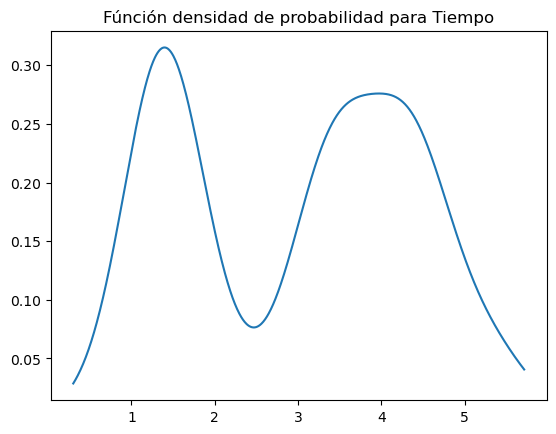

In [176]:
col = df["Tiempo_en_minutos"].dropna()
col_cero = col[col>0]

log_col = np.log10(col_cero)

kde = gaussian_kde(log_col)

x = np.linspace(min(log_col), max(log_col), 1000)

plt.figure
plt.plot(x, kde(x))
plt.title("Fúnción densidad de probabilidad para Tiempo")
plt.show()

<h4 style="color:#0F3D36; font-family:'Montserrat', sans-serif; font-size:20px; font-weight:600; margin-top:15px; margin-bottom:8px;">
Limpieza e imputación
</h4>

Se elimina el trámite con valores nulos en $\texttt{Idtram}$ y se reemplaza con el valor de la media los valores nulos para las columnas con valores numéricos y del mismo modo para las columnas con datos de texto pero utilizando la moda de estas cadenas. 

In [177]:
df = df.dropna(subset = "Idtram")
df.loc[df["Idtram"].isnull()]

,Idtram,Tramite,Secretaria,Dependencia,Domicilio,TraPersona,Tiempo_en_minutos,N_FORMATOS_FINAL,CONTEO_NETO,nivel_digitalizacion,TraResolucionesFavorables,TraResolucionesNegativas,Porcentaje_Efectividad,TraCosto,visitas_totales,Visitas RUTS


In [178]:
mean_time = df["Tiempo_en_minutos"].mean()
mean_vtotal = df["visitas_totales"].mean()
mean_vruts = df["Visitas RUTS"].mean()
top_dig = df["nivel_digitalizacion"].mode()[0]
top_TraPersona = df["TraPersona"].mode()[0]

df["Tiempo_en_minutos"] = df["Tiempo_en_minutos"].fillna(mean_time)
df["visitas_totales"] = df["visitas_totales"].fillna(mean_vtotal)
df["Visitas RUTS"] = df["Visitas RUTS"].fillna(mean_vruts)
df["nivel_digitalizacion"] = df["nivel_digitalizacion"].fillna(top_dig)
df["TraPersona"] = df["TraPersona"].fillna(top_TraPersona)


In [179]:
tabla_info = pd.DataFrame({

    "Data Type": df.dtypes,
    "No Nulos": df.notnull().sum(),
    "Valores Nulos" : df.isnull().sum(),
})
tabla_info

,Data Type,No Nulos,Valores Nulos
Idtram,float64,665,0
Tramite,object,665,0
Secretaria,object,665,0
Dependencia,object,665,0
Domicilio,object,665,0
TraPersona,object,665,0
Tiempo_en_minutos,float64,665,0
N_FORMATOS_FINAL,int64,665,0
CONTEO_NETO,int64,665,0
nivel_digitalizacion,object,665,0


<h4 style="color:#0F3D36; font-family:'Montserrat', sans-serif; font-size:20px; font-weight:600; margin-top:15px; margin-bottom:8px;">
Segundo acercamiento estadístico
</h4>
<h4 style="color:#98989A; font-family:'Montserrat', sans-serif; font-size:16px; font-weight:600; margin-top:15px; margin-bottom:8px;">
Acercamiento de Outliers
</h4>

Se realiza un estimación de outliers mediante la regla de Turkey así como la estimación de la distribución de datos de tiempo imputados. Se observa un claro cambio en la distribución, principalmente en el segundo pico del gráfico. 

In [180]:
print("--Detección de outliers en la columna CONTEO_NETO--")

col = df["CONTEO_NETO"]

Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3-Q1

outlier = Q3 +1.5 * IQR
print("Umbral:", outlier)
outlier_xtreme = Q3 + 3 * IQR
print("Umbral extremo:", outlier_xtreme)

n_outliers = col[col>outlier].count()
print("Número de outliers:", n_outliers)

n_outliers_xtreme = col[col>outlier_xtreme].count()
print("Número de outliers extremos:", n_outliers_xtreme)

p = n_outliers / df.shape[0] * 100
print("Porcentaje de outliers:", p.round(2), "%")
p_xtreme = n_outliers_xtreme / df.shape[0] * 100
print("Porcentaje de outliers extremos:", p_xtreme.round(2), "%")

--Detección de outliers en la columna CONTEO_NETO--
Umbral: 6.0
Umbral extremo: 9.0
Número de outliers: 49
Número de outliers extremos: 16
Porcentaje de outliers: 7.37 %
Porcentaje de outliers extremos: 2.41 %


In [181]:
print("--Detección de outliers en la columna N_FORMATOS_FINAL--")

col = df["N_FORMATOS_FINAL"]

Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3-Q1

outlier = Q3 +1.5 * IQR
print("Umbral:", outlier)
outlier_xtreme = Q3 + 3 * IQR
print("Umbral extremo:", outlier_xtreme)

n_outliers = col[col>outlier].count()
print("Número de outliers:", n_outliers)

n_outliers_xtreme = col[col>outlier_xtreme].count()
print("Número de outliers extremos:", n_outliers_xtreme)

p = n_outliers / df.shape[0] * 100
print("Porcentaje de outliers:", p.round(2), "%")
p_xtreme = n_outliers_xtreme / df.shape[0] * 100
print("Porcentaje de outliers extremos:", p_xtreme.round(2), "%")

--Detección de outliers en la columna N_FORMATOS_FINAL--
Umbral: 2.5
Umbral extremo: 4.0
Número de outliers: 19
Número de outliers extremos: 3
Porcentaje de outliers: 2.86 %
Porcentaje de outliers extremos: 0.45 %


In [182]:
print("--Detección de outliers en la columna visitas_totales--")
col = df["visitas_totales"]
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3-Q1

outlier = Q3 +1.5 * IQR
print("Umbral:", outlier)
outlier_xtreme = Q3 + 3 * IQR
print("Umbral extremo:", outlier_xtreme)

n_outliers = col[col>outlier].count()
print("Número de outliers:", n_outliers)

n_outliers_xtreme = col[col>outlier_xtreme].count()
print("Número de outliers extremos:", n_outliers_xtreme)

p = n_outliers / df.shape[0] * 100
print("Porcentaje de outliers:", p.round(2), "%")
p_xtreme = n_outliers_xtreme / df.shape[0] * 100
print("Porcentaje de outliers extremos:", p_xtreme.round(2), "%")

--Detección de outliers en la columna visitas_totales--
Umbral: 5986.0
Umbral extremo: 9307.0
Número de outliers: 37
Número de outliers extremos: 27
Porcentaje de outliers: 5.56 %
Porcentaje de outliers extremos: 4.06 %


In [183]:
print("--Detección de outliers en la columna Visitas RUTS--")
col = df["Visitas RUTS"]
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3-Q1

outlier = Q3 +1.5 * IQR
print("Umbral:", outlier)
outlier_xtreme = Q3 + 3 * IQR
print("Umbral extremo:", outlier_xtreme)

n_outliers = col[col>outlier].count()
print("Número de outliers:", n_outliers)

n_outliers_xtreme = col[col>outlier_xtreme].count()
print("Número de outliers extremos:", n_outliers_xtreme)

p = n_outliers / df.shape[0] * 100
print("Porcentaje de outliers:", p.round(2), "%")
p_xtreme = n_outliers_xtreme / df.shape[0] * 100
print("Porcentaje de outliers extremos:", p_xtreme.round(2), "%")

--Detección de outliers en la columna Visitas RUTS--
Umbral: 6648.0
Umbral extremo: 10503.0
Número de outliers: 46
Número de outliers extremos: 32
Porcentaje de outliers: 6.92 %
Porcentaje de outliers extremos: 4.81 %


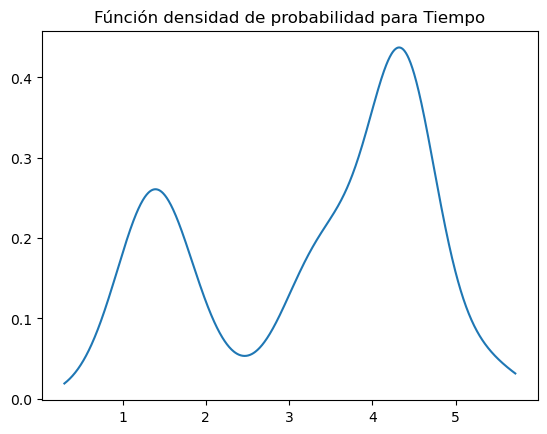

In [184]:
col = df["Tiempo_en_minutos"].dropna()
col_cero = col[col>0]

log_col = np.log10(col_cero)
kde = gaussian_kde(log_col)

x = np.linspace(min(log_col), max(log_col), 1000)

plt.figure
plt.plot(x, kde(x))
plt.title("Fúnción densidad de probabilidad para Tiempo")
plt.show()